# Movies by the Numbers: What makes a movie successful?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.


The TMDB dataset provides data about movies: revenue, genres, directors, budget, popularity, release year, etc. The data is in numerical and text formats. 

I aim to explore the following questions:

* Do actors matter?
* Can you buy a good movie?
* Does revenue per minute affect popularity?
* What are voter's favorite and least favorite genres? Is there correlation with a movie's "popularity"?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('dark')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

>* 10866 entries
* 21 columns
* 2936 completely non-null rows (limited by the homepage column)
* The cast column is a string with actor's names separated by '|'

The dataset begins with movies released in or after 1960, and 75% of the movies were released in or after 1995.


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_db = pd.read_csv('data/tmdb-movies.csv')

In [3]:
movie_db.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movie_db.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Cleaning the Data:

### Shape

* Remove all movies with release dates prior to 1995, leaving 75% of the dataset
* Remove columns that won't be used for this analysis
* Remove movies with 0 values in at least one column
* Remove movies with NaN values (3 from cast column, 1 from director column)

### 2962 Movies Remain

In [6]:
#Remove all movies before 1978
movie_db = movie_db[movie_db['release_year'] >= 1995]

In [7]:
#remove columns that won't be used
unused_cols = ['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies']
movie_db.drop(unused_cols, inplace=True, axis=1)

In [8]:
#remove all movies where the value in at least one column is 0
movie_db = movie_db[(movie_db !=0).all(1)]

In [9]:
movie_db.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              3
director          1
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
movie_db.dropna(inplace=True)

In [11]:
movie_db.rename(columns={'original_title': 'title'}, inplace=True)
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962 entries, 0 to 9153
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2962 non-null   int64  
 1   popularity    2962 non-null   float64
 2   budget        2962 non-null   int64  
 3   revenue       2962 non-null   int64  
 4   title         2962 non-null   object 
 5   cast          2962 non-null   object 
 6   director      2962 non-null   object 
 7   runtime       2962 non-null   int64  
 8   genres        2962 non-null   object 
 9   release_date  2962 non-null   object 
 10  vote_count    2962 non-null   int64  
 11  vote_average  2962 non-null   float64
 12  release_year  2962 non-null   int64  
 13  budget_adj    2962 non-null   float64
 14  revenue_adj   2962 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 370.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Do actors matter?

What is the distribution of actors appearing in the twenty top-grossing movies in this dataset (using revenue adjusted to 2010 dollars and accounting for inflation)?

In [36]:
top_grossing = movie_db.sort_values(by='revenue_adj', ascending=False).head(250)
# top_grossing.set_index('title', inplace=True)
print(top_grossing)

          id  popularity     budget     revenue                         title  \
1386   19995    9.432768  237000000  2781505847                        Avatar   
5231     597    4.355219  200000000  1845034188                       Titanic   
3     140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
8094    1642    1.136610   22000000  1106279658                       The Net   
4361   24428    7.637767  220000000  1519557910                  The Avengers   
...      ...         ...        ...         ...                           ...   
7414    6477    1.748315   60000000   361366633       Alvin and the Chipmunks   
8089    9804    1.232098  175000000   264218220                    Waterworld   
1392     534    3.789633  200000000   371353001          Terminator Salvation   
4372   58595    3.335603  170000000   396600000   Snow White and the Huntsman   
8072    8844    2.245837   65000000   262797249                       Jumanji   

                           

In [37]:
actors_list = dict()
# actors_list = pd.DataFrame()
data = top_grossing[['cast', 'title']].values
for row, title in data:
    if isinstance(row, str):
        row = row.split(sep='|')
        actors_list[title] = row

In [46]:
appearances = dict()
total_revenue = dict()
for title, actors in actors_list.items():
    if title in total_revenue:
        total_revenue[title] += top_grossing.loc[top_grossing['title'] == title, 'revenue_adj']
    else:
        total_revenue[title] = top_grossing.loc[top_grossing['title'] == title, 'revenue_adj']
    for actor in actors:
        if actor in appearances:
            appearances[actor] += 1
        else:
            appearances[actor] = 1
appearances_sorted = dict(sorted(appearances.items(), key=lambda x:x[1], reverse=True))

In [39]:
app_df = pd.DataFrame.from_dict(appearances_sorted, orient='index', columns=['appearances'])
app_df = app_df[app_df['appearances'] > 5]
print(app_df)

                      appearances
Will Smith                      9
Tom Cruise                      9
Ian McKellen                    8
Daniel Radcliffe                8
Rupert Grint                    8
Emma Watson                     8
Tom Hanks                       8
Ben Stiller                     8
Orlando Bloom                   7
Gary Oldman                     7
Robert Downey Jr.               6
Johnny Depp                     6
Cameron Diaz                    6
Anne Hathaway                   6
Helena Bonham Carter            6
Samuel L. Jackson               6
Kristen Stewart                 6
Brad Pitt                       6


/Users/graemefickling/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='appearances'>

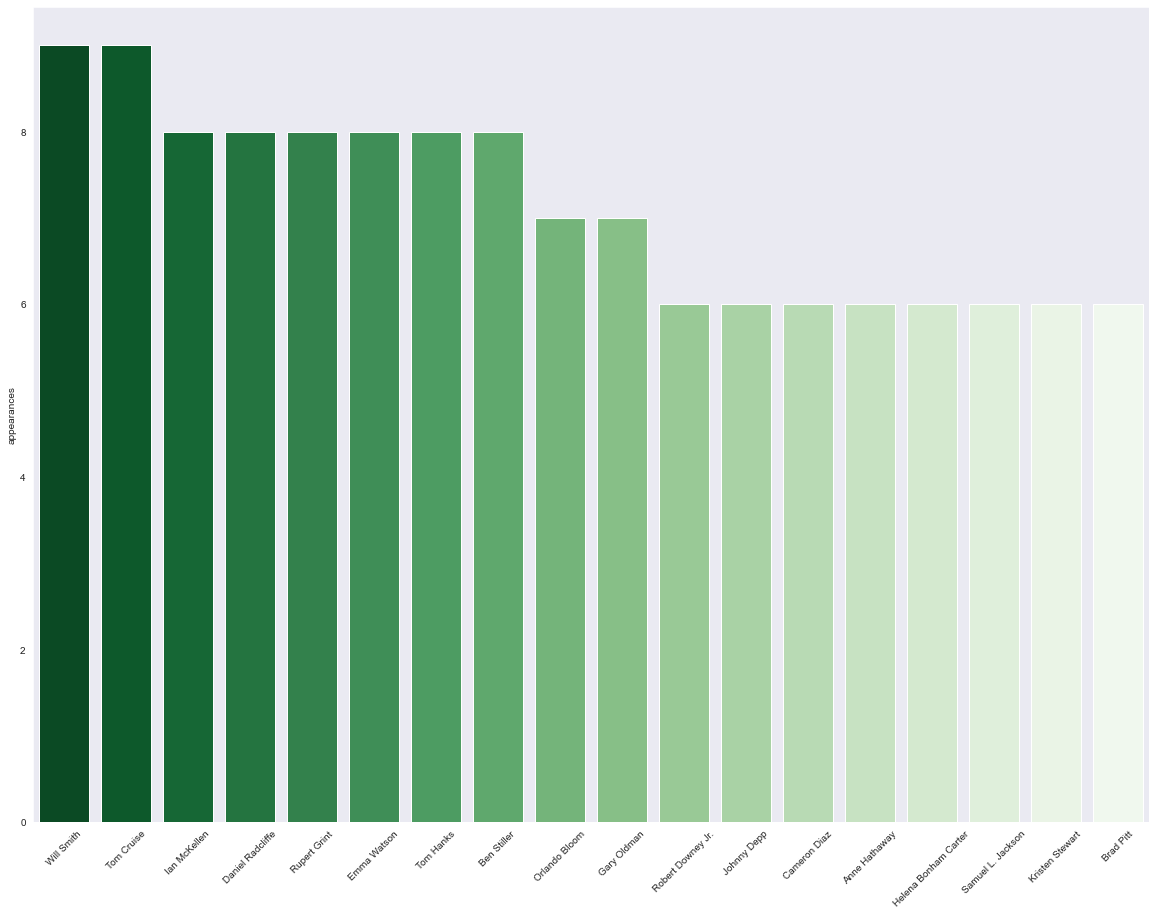

In [40]:
color = cm.rainbow
x = list(app_df.index)
y = app_df['appearances']
plt.figure(figsize=(20, 15))
plt.xticks(rotation=45)

sns.barplot(x, y, palette='Greens_r')

### Research Question 2: Can you buy a good movie?

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 3: Does revenue per minute predict popularity?

### Research Question 4: Do voters in this dataset prefer certain genres more than others?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!